# Lab5 Integtation

# Quadrate Formules
<font size = '5'> </font>    

<font size = '4'>The main problem of numerical integration: Find the approximate value of a definite integral </font>    
><font size = '3'>$S(f) \approx I(f) = \int_{a}^{b}f(x)dx$ </font>    


<font size = '4'> Here we will be helped by __Quadrature Formulas__ (Newton - Cotes formulas) </font>    
## IDEA
<font size = '4'> Take the mapping of the segment [-1, 1] to [a, b]: </font>    
><font size = '3'>$x = x(t) = \frac{a + b}{2} + \frac{b - a}{2}t$ </font>    
>
><font size = '3'>$t_1, \cdots, t_n \in [-1, 1], x_i = x(t_i)$ </font>    

<font size = '4'>We construct an interpolation polynomial: </font>    
><font size = '3'>$L_{n-1}(x) = \sum_{i=1}^{n}f(x_i)l_i(x) = \sum_{i=1}^{n}f(x_i) \prod_{j=i, j \neq i}^{n} \frac{x - x_j}{x_i - x_j}$ </font>    

<font size = '4'>And Integrate that: </font>    
><font size = '3'>$S(f) = \int_{a}^{b} L_{n - 1}(x)dx = \sum_{i = 1}^{n} d_i f(x_i), d_i = \frac{b - a}{2} \int_{-1}^{1} l_i(t)dt$ </font>  

<font size = '5'>Wow, we get uniform formul</font>    

<font size = '4'> Find error these integral(get of formul for err interpolation polynomial):  </font>    
><font size = '3'>$\bigg|I(f) - S(f)\bigg| \leq \frac{||f^{(n)}||_C}{n!}\bigg(\frac{b-a}{2}\bigg)^{n + 1}\int_{-1}^{1}\bigg|\prod_{j=1}{n}(t - t_j)\bigg|dt$ </font>       

In [336]:
import numpy as np
import matplotlib.pyplot as plt

# Start function

In [505]:
start = -np.pi
end   = np.pi

func = lambda x: np.exp(x)
Real_answ = np.exp(end) - np.exp(start)

# func = lambda x: x**2
# Real_answ = ((end**3) - (start**3))/3

# func = lambda x: np.sin(x) + 3
# Real_answ = -np.cos(end) + np.cos(start) + 3*(end) - 3*(start)

# func = lambda x: np.abs(x)
# Real_answ = np.sign(start)*start - np.sign(end)*end

# func = lambda x: 1/(25*x**2 + 1)
# Real_answ = 1/5*np.arctan(5*start) - 1/5*np.arctan(5*end)

# Calc own ERROR

In [584]:
def linearize (X, Y):
    A = np.vstack ([X, np.ones (X.size)]).T
    k, b = np.linalg.lstsq (A, Y, rcond=None)[0]

    return k, b

def Ierr(Ifunc):
    err = np.array([])
    rng = range(10, 50)
    arr_distance = np.array([])
    for n in rng:
        xerr = np.linspace(start, end, n)
        arr_distance = np.append(arr_distance, np.abs(xerr[0] - xerr[1]))
        ans, b = Ifunc(func, xerr)
        nerr = np.abs(ans - Real_answ)
        err = np.append(err, nerr)    
     
    k1, b1 = linearize(np.log(arr_distance), np.log(err))
    k2, b2 = linearize(np.log(arr_distance), np.log([1/(i**2) for i in rng]))
    plt.plot(np.log(arr_distance), np.log(err), label='k1: Method error in log skale')  
    plt.plot(np.log(arr_distance), np.log([1/(i**2) for i in rng]), label='k2: Only quadratic dependence')
    plt.legend()
    return k1, k2, err

# Rectangles

<font size='3'>Left or right rectangles.</font>
>We divide the segment into n equidistant points. We sum up the rectangles, take the left or right point.

In [585]:
def Integr_rec(func, x):
    n = len(x)
    y = func(x)
    ans = np.sum(y[0:n - 1]*([x[i + 1] - x[i] for i in range(n - 1)]))
    blocks = [ [y[i + 1], x[i], x[i + 1]] for i in range(n - 1)]
    return ans, blocks

Integral_my: 15.965523815584042, Integral_real: 23.097478714515496
Error: 7.131954898931454


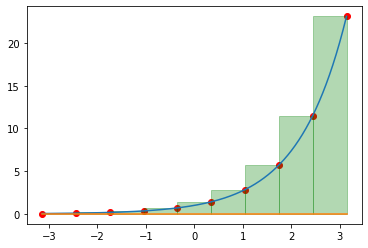

In [586]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_rec(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(len(blocks)):
    plt.fill_between([blocks[i][2], blocks[i][1]], [blocks[i][0], blocks[i][0]], color='g', alpha=0.3)

### Error
#### __The error approximate Integral depends on h linearly__

(0.9470768741894128,
 1.9091819497833518,
 array([7.1319549 , 6.5013636 , 5.97201592, 5.52160924, 5.13386895,
        4.79666524, 4.5007852 , 4.23911266, 4.00606769, 3.79721561,
        3.60898892, 3.43848608, 3.28332366, 3.14152597, 3.01144175,
        2.89168033, 2.78106233, 2.67858107, 2.58337217, 2.49468926,
        2.41188459, 2.33439324, 2.26172036, 2.19343061, 2.12913949,
        2.06850616, 2.01122739, 1.95703256, 1.90567933, 1.85695013,
        1.81064898, 1.76659897, 1.72463993, 1.68462652, 1.64642658,
        1.60991963, 1.57499563, 1.54155385, 1.50950196, 1.47875511]))

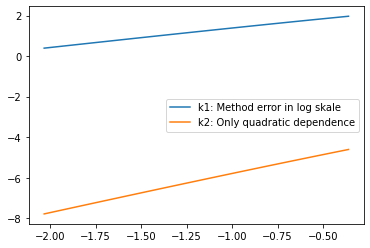

In [587]:
Ierr(Integr_rec)

# Center rectangles

### How get center rectangles?

<font size = '4'>Let us look for an interpolation polynomial at one point then:</font>    
><font size = '3'>$n = 1$ and let's $h = b - a, M_m = ||f^{(m)}||_{C[a, b]}$ </font>    
>
><font size = '3'>$n = 1 \Rightarrow S(f) = f\bigg(\frac{a + b}{2}\bigg)h,\;\;\;\; \bigg|I(f) - S(f)\bigg| \leq \frac{1}{4}M_1h^2$ </font>    
><font size = '4'> UPD: error formula is not precise enough, we can use ermit interpolation and get:</font>    
>><font size = '3'> $t_1 = t_2 = 0: H(t) = f(0) + f^{'}(0)t \Rightarrow f \in C^2: \bigg|I(f) - S(f)\bigg| \leq \frac{1}{24}M_2h^3$ </font>  

<font size = '5'>And we got the legal formula for Center Rectangles !!! </font>    

In [588]:
def Integr_crec(f, x):
    n = len(x)
    ans = 0
    for i in range(1, n):
        ans += f((x[i] + x[i - 1])/2)*(x[i] - x[i - 1])
    blocks = [ [f((x[i + 1] + x[i])/2), x[i], x[i + 1]] for i in range(n - 1)]
    return ans, blocks

Integral_my: 22.635002385409102, Integral_real: 23.097478714515496
Error: 0.46247632910639425


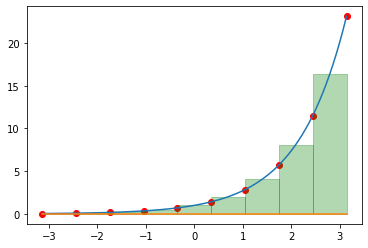

In [589]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_crec(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(len(blocks)):
    plt.fill_between([blocks[i][2], blocks[i][1]], [blocks[i][0], blocks[i][0]], color='g', alpha=0.3)


## Error Center rectagles
#### __The error approximate Integral depends on h quadratically__

(1.9938899585326475,
 1.9091819497833518,
 array([0.46247633, 0.37560855, 0.31103602, 0.26175141, 0.22329319,
        0.19271328, 0.16800128, 0.14774856, 0.13094462, 0.1168495 ,
        0.10491134, 0.09471186, 0.08592939, 0.0783133 , 0.07166596,
        0.06582989, 0.06067832, 0.0561083 , 0.05203553, 0.04839044,
        0.04511519, 0.04216142, 0.0394884 , 0.03706167, 0.03485188,
        0.03283393, 0.03098624, 0.0292902 , 0.02772965, 0.02629055,
        0.02496061, 0.02372907, 0.02258645, 0.0215244 , 0.02053552,
        0.01961325, 0.01875172, 0.01794573, 0.0171906 , 0.01648214]))

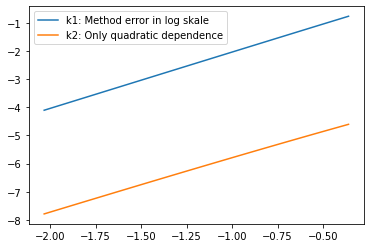

In [590]:
Ierr(Integr_crec)  

# Trapeze

### How get Trapze formul?

<font size = '4'>let us look for an interpolation polynomial at one point then:</font>    
><font size = '3'>$n = 2$ and let's $h = b - a, M_m = ||f^{(m)}||_{C[a, b]}$ </font>    
>
><font size = '3'>$n = 2 \Rightarrow S(f) = \frac{f(a) + f(b)}{2}h,\;\;\;\; \bigg|I(f) - S(f)\bigg| \leq \frac{1}{12}M_2h^2$ </font>    

<font size = '5'>And we got the legal formula for Trapeze integration !!! </font>   

In [591]:
def Integr_trap(f, x):
    n = len(x)
    ans = 0
    for i in range(1, n):
        ans += ((f(x[i]) + f(x[i - 1]))/2)*(x[i] - x[i - 1])
    blocks = [ [f(x[i + 1]), f(x[i]), x[i], x[i + 1]] for i in range(n - 1)]
    return ans,blocks

Integral_my: 24.028064865136095, Integral_real: 23.097478714515496
Error: 0.9305861506205986


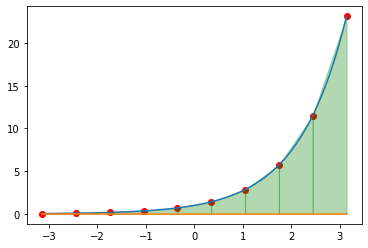

In [592]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_trap(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(len(blocks)):
    plt.fill_between([blocks[i][3], blocks[i][2]], [blocks[i][0], blocks[i][1]], color='g', alpha=0.3)


## Error Trapeze method 
#### __The error approximate Integral depends on h quadratically__

(1.9965131250358714,
 1.9091819497833518,
 array([0.93058615, 0.75492334, 0.62460857, 0.52529655, 0.44789023,
        0.38639686, 0.33673943, 0.29606668, 0.26233639, 0.23405491,
        0.21010948, 0.18965739, 0.17205108, 0.15678628, 0.14346562,
        0.13177257, 0.12145245, 0.11229852, 0.10414151, 0.09684179,
        0.09028332, 0.08436907, 0.07901736, 0.07415906, 0.06973534,
        0.06569589, 0.06199745, 0.05860271, 0.0554793 , 0.05259907,
        0.04993741, 0.04747277, 0.04518616, 0.04306085, 0.04108201,
        0.03923649, 0.03751258, 0.03589983, 0.03438888, 0.03297134]))

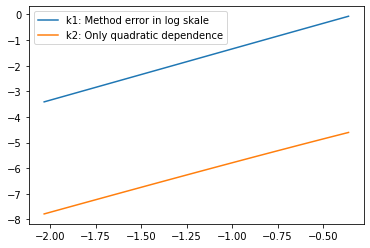

In [593]:
Ierr(Integr_trap)  

# Simpson's rule

### How get Trapze formul?

#### Simpson's formula will turn out if we interpolate at three points -1, 0, +1 will give the result
>#### (Hermitian interpolation with multiple nodes -1, 0, 0, +1 will also give the same result) 
>>#### $S(f) = \frac{h}{6}\bigg(f(a) + 4f\frac{a + b}{2} + f(b)\bigg), E \leq Ch^4$

In [601]:
from scipy.interpolate import BarycentricInterpolator
def Integr_sim(f, x):
    n = len(x)
    ans = 0
    for i in range(0, n - 1):
        ans += (f(x[i]) + 4 * f((x[i] + x[i + 1])/2) + f(x[i + 1])) * (x[i + 1] - x[i])
    ans /= 6    
    
    blocks = [ [f(x[i]), f((x[i] + x[i + 1])/2), f(x[i + 1]), x[i], x[i + 1]] for i in range(n - 1)]
    return ans,blocks

Integral_my: 23.099356545318102, Integral_real: 23.097478714515496
Error: 0.0018778308026057289


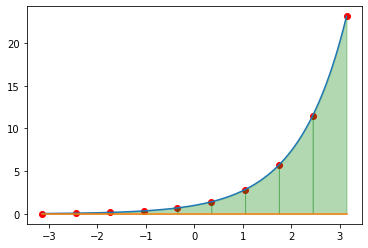

In [602]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_sim(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(0, n -1):
    xxx = np.linspace(x[i], x[i + 1], 50)
    inter_X = [x[i], (x[i] + x[i + 1])/2, x[i + 1]]
    inter_Y = [func(x[i]), func((x[i] + x[i + 1])/2), func(x[i + 1])]
    interpol_func = BarycentricInterpolator(inter_X, inter_Y)
    yyy = interpol_func(xxx)
    plt.fill_between(xxx, yyy, color='g', alpha=0.3)


## Error Simson's method
#### __The error approximate Integral depends on $O(h^4)$ __

(3.9937643570620156,
 1.9091819497833518,
 array([1.87783080e-03, 1.23541128e-03, 8.45510933e-04, 5.97907488e-04,
        4.34617049e-04, 3.23431202e-04, 2.45619671e-04, 1.89854918e-04,
        1.49050334e-04, 1.18639360e-04, 9.56016540e-05, 7.78928006e-05,
        6.41000651e-05, 5.32289042e-05, 4.45673109e-05, 3.75977096e-05,
        3.19385850e-05, 2.73051033e-05, 2.34821019e-05, 2.03052783e-05,
        1.76479045e-05, 1.54113205e-05, 1.35180500e-05, 1.19067586e-05,
        1.05285223e-05, 9.34403915e-06, 8.32152619e-06, 7.43511967e-06,
        6.66364805e-06, 5.98968396e-06, 5.39880629e-06, 4.87902185e-06,
        4.42030931e-06, 4.01425725e-06, 3.65377527e-06, 3.33286210e-06,
        3.04641857e-06, 2.79009592e-06, 2.56017220e-06, 2.35345111e-06]))

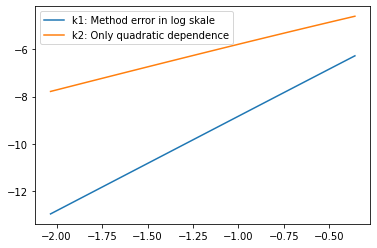

In [600]:
Ierr(Integr_sim)

### __Fun fact: We can split a segment into N different length: $\frac{b - a}{N}$__
### And then apply any quadrature formula on each segment (different quadrature formulas can be used on different segments),
### Adding the results on different segments.

### Then the compound error will be:
>### $E = NO(h^{p}) = \frac{b - a}{h}O(h^p) = O(h^{p - 1})$, p - order of precision

# Runge

### Consider a formulac $S_1$ with algebraic precision n - 1 on a segment of length h, c - midpoint

### Expand the function into a Taylor series at the point. Since the algebraic precision is n - 1, then:
>### $I(f) - S_1(f) =  \alpha f^{(n)}(c)h^{n + 1} + O(h^{n + 2}) $
### we divide the segment into 2 parts and apply our formula $S_1$ to each:
>### $I(f) - S_2(f)  =  \alpha f^{(n)}(c)\frac{h^{n + 1}}{2^{n}} + O(h^{n + 2}) \Rightarrow$
### Subtract:
>### $I(f) - S_2(f) = \frac{S_2 - S_1}{2^n - 1}$

### We can thicken the integration grid in half, calculate the difference between $S_2 - S_1$, and divide by $2^n - 1$. 
## And this will be an excellent error estimate for our formula


## It turns out that we can split the grid and count the integrals until we get sufficient accuracy

In [490]:
def runge(Ifunc, n0, eps=1e-2):
    
    
    
    x0  = np.linspace(start, end, n0)
    y0  = func(x)

    I0, blocks0 = Ifunc(func, x0)

    print("Start_intergal: {}, Integral_real: {}".format(I0, Real_answ))
    print("Start_Error: {}".format(np.abs(I0 - Real_answ)))
    print("n start: {}\n\n".format(n0))
    
    n2 = n0*2
    x2 = np.linspace(start, end, n2)
    I2, blocks2 = Ifunc(func, x2)

    delta = (np.abs(I2 - I0))/3

    while delta  > eps:

        I0 = I2
        n2 = n2*2
        x2 = np.linspace(start, end, n2)
        I2, blocks = Ifunc(func, x2)

        delta = (np.abs(I2 - I0))/3

    print("Integral_my: {}, Integral_real: {}".format(I2, Real_answ))
    print("Error: {}, RungeError: {}".format(np.abs(I2 - Real_answ), delta))
    print("n start: {}, n_end: {}".format(n0, n2))

    return n2

## Rectangles

In [615]:
n0=3
eps = 1e-3
runge(Integr_rec, n0, eps)

Start_intergal: 3.27735318174009, Integral_real: 23.097478714515496
Start_Error: 19.820125532775407
n start: 3


Integral_my: 23.09452612947483, Integral_real: 23.097478714515496
Error: 0.0029525850406670884, RungeError: 0.000984191222606512
n start: 3, n_end: 24576


24576

# Center rectels

In [616]:
n0=3
eps = 1e-3
runge(Integr_crec, n0, eps)

Start_intergal: 15.765633350195529, Integral_real: 23.097478714515496
Start_Error: 7.3318453643199675
n start: 3


Integral_my: 23.097219707150522, Integral_real: 23.097478714515496
Error: 0.0002590073649741953, RungeError: 0.0002608095789149445
n start: 3, n_end: 384


384

# Trapeze

In [617]:
n0=3
eps = 1e-3
runge(Integr_trap, n0, eps)

Start_intergal: 39.55878790472434, Integral_real: 23.097478714515496
Start_Error: 16.461309190208844
n start: 3


Integral_my: 23.0979967309881, Integral_real: 23.097478714515496
Error: 0.000518016472604188, RungeError: 0.0005216279686356037
n start: 3, n_end: 384


384

# Simon's method

In [618]:
n0=3
eps = 1e-3
runge(Integr_sim, n0, eps)

Start_intergal: 23.6966848683718, Integral_real: 23.097478714515496
Start_Error: 0.5992061538563043
n start: 3


Integral_my: 23.0975232818264, Integral_real: 23.097478714515496
Error: 4.4567310904852775e-05, RungeError: 0.0002669812073534672
n start: 3, n_end: 24


24

# Improper integrals

In [619]:
imfunc = lambda x: np.cos(x)/np.sqrt(x)


/tmp/ipykernel_6031/4020757163.py:1: RuntimeWarning: divide by zero encountered in true_divide
  imfunc = lambda x: np.cos(x)/np.sqrt(x)


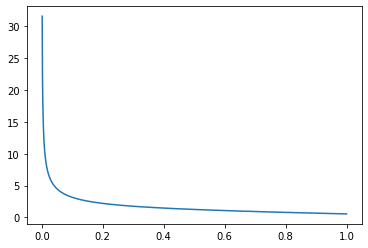

In [620]:
xx = np.linspace(0, 1, 1000)
plt.plot(xx, imfunc(xx))